In [1]:
import pandas as pd

pima = pd.read_csv('./datasets/diabetes.csv')

In [2]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

x = pima.drop('Outcome', axis=1)
y = pima['Outcome']

In [6]:
# train셋과 test셋 분리 ( 8:2 ) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100, stratify=y)

In [8]:
# 로지스틱 회귀로 학습,예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]
print(pred)
print(pred_proba)

[0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 1 0 0 0]
[0.14716008 0.14651994 0.94085382 0.253152   0.72079248 0.45759641
 0.54737488 0.03875467 0.03853213 0.45724424 0.19912659 0.10397188
 0.37049545 0.11394928 0.75730287 0.77185012 0.36566027 0.31463023
 0.03780043 0.11524189 0.05233003 0.22550489 0.14844269 0.65065928
 0.0920315  0.18510734 0.50786957 0.01979342 0.26763391 0.65386902
 0.61289441 0.8352156  0.63461674 0.24458935 0.14971604 0.66017854
 0.12061443 0.11451817 0.23386753 0.25733835 0.05436948 0.19492836
 0.37931649 0.15274605 0.33200632 0.05865765 0.0779243  0.37770152
 0.22334523 0.69989997 0.45970355 0.13203086 0.18614603 0.18914597
 0.16891061 0.56899464 0.08096841 0.39796269 0.73401053 0.1715914
 0.70194213 0.286

C:\Users\Hong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
precision_recall_curve(y_test, pred_proba)

(array([0.35064935, 0.35294118, 0.35526316, 0.35761589, 0.36      ,
        0.36241611, 0.36486486, 0.36734694, 0.36986301, 0.37241379,
        0.375     , 0.37762238, 0.38028169, 0.38297872, 0.38571429,
        0.38848921, 0.39130435, 0.39416058, 0.39705882, 0.4       ,
        0.40298507, 0.40601504, 0.40909091, 0.41221374, 0.41538462,
        0.41085271, 0.4140625 , 0.41732283, 0.42063492, 0.424     ,
        0.42741935, 0.43089431, 0.43442623, 0.43801653, 0.44166667,
        0.44537815, 0.44915254, 0.45299145, 0.45689655, 0.46086957,
        0.46491228, 0.46017699, 0.46428571, 0.46846847, 0.47272727,
        0.47706422, 0.48148148, 0.48598131, 0.49056604, 0.4952381 ,
        0.5       , 0.50485437, 0.50980392, 0.51485149, 0.52      ,
        0.51515152, 0.51020408, 0.50515464, 0.51041667, 0.51578947,
        0.5212766 , 0.51612903, 0.52173913, 0.52747253, 0.53333333,
        0.53932584, 0.54545455, 0.55172414, 0.55813953, 0.56470588,
        0.57142857, 0.57831325, 0.58536585, 0.58

In [47]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall')
    plt.legend()
    plt.grid()

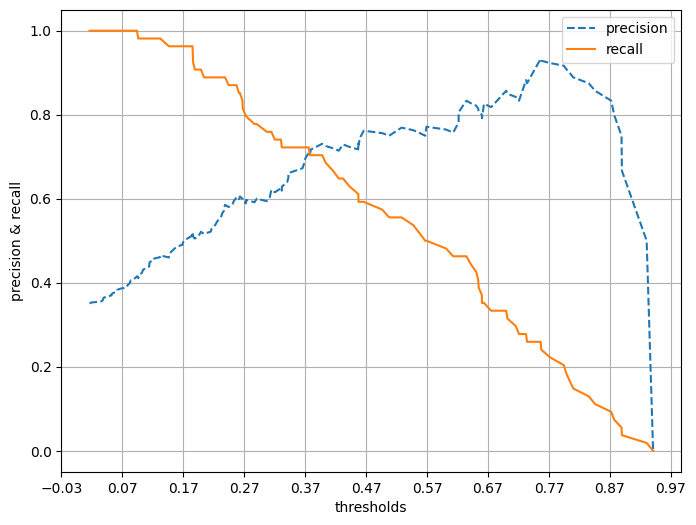

In [48]:
precision_recall_curve_plot(y_test, pred_proba)

In [54]:
roc_curve(y_test,pred_proba)

(array([0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04, 0.05, 0.05,
        0.08, 0.08, 0.09, 0.09, 0.1 , 0.1 , 0.12, 0.12, 0.13, 0.13, 0.14,
        0.14, 0.16, 0.16, 0.24, 0.24, 0.25, 0.25, 0.28, 0.28, 0.29, 0.29,
        0.3 , 0.3 , 0.31, 0.31, 0.34, 0.34, 0.45, 0.45, 0.48, 0.48, 0.61,
        0.61, 0.76, 0.76, 1.  ]),
 array([0.        , 0.        , 0.25925926, 0.25925926, 0.27777778,
        0.27777778, 0.33333333, 0.33333333, 0.35185185, 0.35185185,
        0.46296296, 0.46296296, 0.5       , 0.5       , 0.55555556,
        0.55555556, 0.59259259, 0.59259259, 0.61111111, 0.61111111,
        0.64814815, 0.64814815, 0.7037037 , 0.7037037 , 0.72222222,
        0.72222222, 0.74074074, 0.74074074, 0.75925926, 0.75925926,
        0.77777778, 0.77777778, 0.7962963 , 0.7962963 , 0.85185185,
        0.85185185, 0.87037037, 0.87037037, 0.88888889, 0.88888889,
        0.90740741, 0.90740741, 0.96296296, 0.96296296, 0.98148148,
        0.98148148, 1.        , 1.        ]),
 array([1.94

In [49]:
def roc_curve_plot(y_test,pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_c1)
    
    # Roc curve를 plot 곡선으로 기름
    plt.plot(fprs,tprs,label='ROC')
    ## 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],"k--",label="ramdom")
    
    ## fpr x축을 scale을 0.1단위로 변경 x,y축 명 설정
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-sensitivity)')
    plt.ylabel('TPR(recall)')
    plt.legend()
    plt.show()

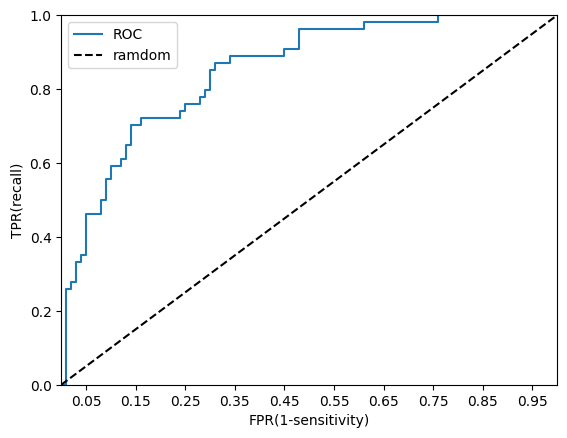

In [50]:
roc_curve_plot(y_test, pred_proba)

In [57]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

In [59]:
get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[90 10]
 [24 30]]
정확도: 0.7792, 정밀도: 0.7500, 재현율: 0.5556, F1: 0.6383, AUC:0.8509
